# Esperança e distribuição acumulada

## Distribuição acumulada

O código a seguir permite mostrar a função de distribuição acumulada.

(-0.01, 1.01)

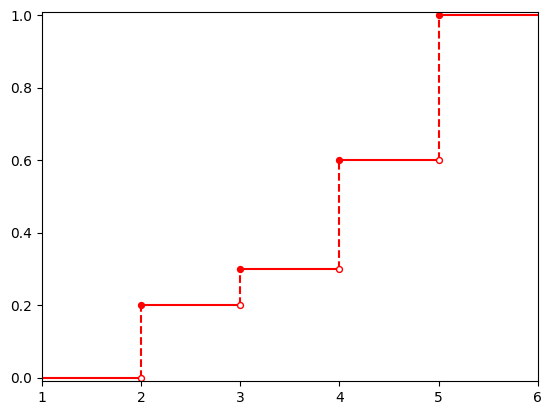

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#data = np.arange(1, 7)
#y = np.array([.07, .21, .42, .68, 1.])
#yn = np.insert(y, 0, 0)

data = [1,2,3,4,5,6]
y = np.array([0.2,0.3,0.6,1])
yn = np.insert(y, 0,0)

fig, ax = plt.subplots()
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=data[:-1], xmax=data[1:],
          color='red', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=data[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
          linestyle='dashed', zorder=1)

ax.scatter(data[1:-1], y, color='red', s=18, zorder=2)
ax.scatter(data[1:-1], yn[:-1], color='white', s=18, zorder=2,
           edgecolor='red')
ax.grid(False)
ax.set_xlim(data[0], data[-1])
ax.set_ylim([-0.01, 1.01])

Distribuição acumuada da uniforme.
$$
f(x) =
\begin{cases}
\frac{1}{b-a} \quad  a \leq x \leq b\\
0 \quad \text{caso contrário}
\end{cases}
$$

$$
F(x)= P(X\leq x) = \begin{cases}
0 \quad \text{se } x < a,\\
\frac{x-a}{b-a} \quad \text{se } a\leq x < b\\
1 \quad \text{se } x \geq b.
\end{cases}
$$

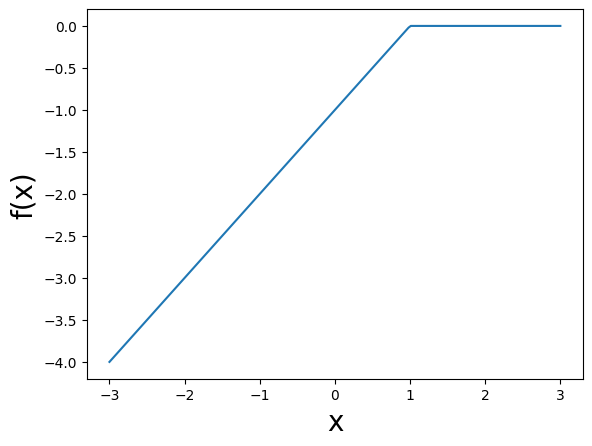

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
b = 2
x = np.linspace(-3,3,200)
F = []
for i in x:
    if i < a:
        F.append((i-a)/(b-a))
    else:
        F.append(0)

plt.plot(x,F)
plt.xlabel('x',fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.savefig('cum_unif.svg')
plt.show()

## Valor esperado

Vamos calcular o valor médio na face de um dado depois de muitos lançamentos.

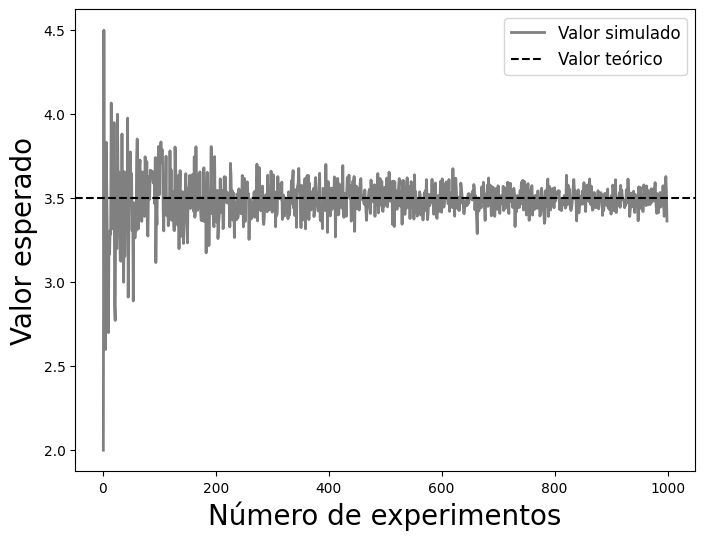

In [3]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

medias = []
S = range(1,1000) # número de simulações
for s in S: # simula
    saidas_dado = []
    for n in range(0,s):# para s simulações
        # guarda o valor na face do dado
        saidas_dado.append(randint(1, 6))
    # armazena o valor esperado
    medias.append(np.mean(saidas_dado))
# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(S, medias, linestyle='-', color="gray",
         linewidth=2,label = 'Valor simulado')
plt.axhline(y=3.5, color='black',
            linestyle='--', label = 'Valor teórico')
plt.xlabel("Número de experimentos", fontsize=20)
plt.ylabel("Valor esperado", fontsize=20)
plt.legend(fontsize = 12)
plt.savefig('ex-expectance.svg')
plt.show(True)

**Exemplo:** Uma padaria produz pães que proporcionam um lucro de R\\$1,00 real, quando vendidos, ou um prejuízo de R\$0,50 quando são encaminhados para virarem farinha, no outro dia.  Se a probabilidade de vender um pão é igual a 0,8, qual o lucro médio da padaria?


In [4]:
import numpy as np

Ns = 1000 # número de simulações
p = 0.8 # probabilidade de vender um pão
lucro = 1 # lucro por pão
prejuizo = 0.5 # prejuízo por pão
ganho = 0 # lucro médio
for s in range(0,Ns):
    # se vende um pão
    if np.random.uniform() < p:
        ganho = ganho + lucro
    # caso contrário
    else:
        ganho = ganho - prejuizo
print('Lucro médio: ', ganho/Ns)

Lucro médio:  0.7015


**Exemplo:** Dez fichas numeradas de 1 até 10 são colocadas em uma urna. Duas fichas são retiradas e seus números, $X_1$ e $X_2$, são verificados. Qual é a probabilidade de que $X_1+X_2 = 12$?

In [5]:
import numpy as np
import random

random.seed(101)

n = 10 # número de fichas
soma = 12 # soma das fichas
urna = range(1,n+1) # define a urna
ns = 100 # número de simulações
k = 0 # número de sucessos
for s in range(0,ns):
    # seleciona as fichas
    ficha1 = random.choice(urna)
    ficha2 = random.choice(urna)
    if ((ficha1 + ficha2) == soma):
        # se a soma é igual a 12, temos um sucesso
        k = k + 1
print('Probabilidade = ', k/ns)

Probabilidade =  0.06
